# Open-source and Python for the acquisition and the treatment of scientific big data

## Example of an experiment of stratified and rotating turbulence in the Coriolis platform

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

<img src="./fig/coriolis2.jpg"  style="width: 70%" align="middle">

<h4 align="center">The Coriolis platform (13 m diameter)</h4> 

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

<img src="./fig/scheme_exp_grid_MILESTONE_Euhit.png"  style="width: 70%" align="middle">

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

<img src="./fig/fig_scheme_milestone.jpg"  style="width: 70%" align="middle">

## Control of experiments in fluid mechanics

### Physical experiments can be seen as the interaction of autonomous physical objects

Examples :
- moving carriage, motor (Modbus TCP)
- probe attached to a transverse
- oscillating mirror driven by a acquisition board
- cameras

Issue: control with (a) computer(s) of the interactions and synchronization of the objects

## Control of experiments in fluid mechanics

### Physical experiments can be seen as the interaction of autonomous physical objects

Object-oriented programming is very adapted.

**Remark**: simple servers with the Python package `rcpy` are useful and efficient:

#### Carriage
- `motor.py`
- `position_sensor.py`
- `position_sensor_server.py`
- `position_sensor_client.py`
- `carriage.py`
- `carriage_server.py`
- `carriage_client.py`

#### Probes
- `traverse.py`
- `probe.py`
- `moving_probe.py`

#### Oscillating mirror and cameras...

## Treatment of experimental data (large series of images)

- copy into the cluster disks, reorganization and format conversions
- pretreatment of images png -> png (calcul on the cluster)
- scientific treatment of images and other data (calcul on the cluters)
- production of scientific images

## Issues: how to write reusable code? Open-science? Open-source?

- software carpentry
- good coding, documentation, unittests
- specialized code for scientific communities

Only the very beginning of this trend in fluid mechanics.

## FluidDyn project: a suite of Python packages for fluid dynamics

Open-source, documented and tested

- [fluiddyn](https://bitbucket.org/fluiddyn/fluiddyn): base package containing utilities
- [fluidlab](https://bitbucket.org/fluiddyn/fluidlab): control of laboratory experiments
- [fluidimage](https://bitbucket.org/fluiddyn/fluidimage): scientific treatments of images (PIV)
- [fluidfft](https://bitbucket.org/fluiddyn/fluidfft)
- [fluidsim](https://bitbucket.org/fluiddyn/fluidsim)
- [fluidfoam](https://bitbucket.org/fluiddyn/fluidfoam)

## Calcul of scanned PIV on the LEGI cluster

Embarrassingly parallel

Steps:
- calibration (using UVmat),
- pre-processing of images,
- calcul of PIV for the different levels,
- going into real space and reorganization of the data.

Remarks: done with clever scripts which adapt the parameters to the experiments and levels.

Remarks: very demanding in terms of Input/Output.

## Analysis and production of scientific figures

#### Mainly using Python (numpy, scipy and matplotlib).

#### Classes for experiments and types of data (for example probe data or PIV field).

In [1]:
# this ipython command loads a special backend for notebooks
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from fluidcoriolis.milestone import Experiment
iexp = 47
exp = Experiment(iexp)
exp.name

'Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d'

In [3]:
print('N = {} rad/s and Uc = {} m/s'.format(exp.N, exp.Uc))

N = 0.8 rad/s and Uc = 0.08 m/s


In [4]:
from fluidcoriolis.milestone.time_signals import TimeSignals
signals = TimeSignals(iexp)

Experiment 47
Probe on the carriage without correction in temperature.
Probe at the surface with correction in temperature.
Probe at the bottom with correction in temperature.
Probe on the left without correction in temperature.
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/positions_traverses_2016-07-05_11-31-34.txt
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/profiles_left.h5
Probe on the right with correction in temperature.
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/positions_traverses_2016-07-05_11-31-34.txt
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/profiles_right.h5


In [5]:
signals.probe_left.plot_density()

<IPython.core.display.Javascript object>

In [6]:
signals.probe_left.plot_density()
ax = plt.gca()
ax.set_xlim([470, 500])

<IPython.core.display.Javascript object>

(470, 500)

In [7]:
signals.probe_left.plot_profiles()

<IPython.core.display.Javascript object>

In [8]:
signals.probe_left.profiles

[{'density': array([ 1.00172606,  1.00172959,  1.00172959, ...,  1.04088178,
          1.04088355,  1.04088531]),
  'position': array([ 0.79250885,  0.79248911,  0.79246938, ...,  0.0775575 ,
          0.07753237,  0.07750725]),
  'time': array([-30.842   , -30.837833, -30.833667, ..., -21.860667, -21.8565  ,
         -21.852334])},
 {'density': array([ 1.00260847,  1.00260318,  1.00260671, ...,  1.04026938,
          1.04026938,  1.04026233]),
  'position': array([ 0.78589451,  0.78581781,  0.7857411 , ...,  0.0800629 ,
          0.07987981,  0.07969675]),
  'time': array([ 29.751166,  29.755333,  29.7595  , ...,  38.137333,  38.1415  ,
          38.145666])},
 {'density': array([ 1.00286261,  1.00287849,  1.00285202, ...,  1.04020762,
          1.04017938,  1.04018821]),
  'position': array([ 0.79123133,  0.79115462,  0.79107792, ...,  0.08049243,
          0.080382  ,  0.08027158]),
  'time': array([ 89.748166,  89.752333,  89.7565  , ...,  98.339833,  98.344   ,
          98.348167

In [9]:
signals.probe_left.calcul_N()

(array([ 0.76145041,  0.77736962,  0.79270484,  0.70869047,  0.72009446,
         0.81134296,  0.79109795,  0.77188794,  0.74611911,  0.78460655,
         0.78851468,  0.7952865 ]),
 array([ 1.02360677,  1.02370974,  1.02357348,  1.02434725,  1.0239517 ,
         1.02391984,  1.02406045,  1.02399537,  1.02343856,  1.02381898,
         1.02305347,  1.02313215]))

In [10]:
signals.probe_left._make_profiles()
signals.probe_left.profiles

[{'density': array([ 1.00116749,  1.00117037,  1.00117037, ...,  1.03923819,
          1.03924012,  1.03924205]),
  'position': array([ 0.79250885,  0.79248911,  0.79246938, ...,  0.0775575 ,
          0.07753237,  0.07750725]),
  'time': array([-30.842   , -30.837833, -30.833667, ..., -21.860667, -21.8565  ,
         -21.852334])},
 {'density': array([ 1.00189161,  1.00188724,  1.00189015, ...,  1.03856951,
          1.03856951,  1.03856181]),
  'position': array([ 0.78589451,  0.78581781,  0.7857411 , ...,  0.0800629 ,
          0.07987981,  0.07969675]),
  'time': array([ 29.751166,  29.755333,  29.7595  , ...,  38.137333,  38.1415  ,
          38.145666])},
 {'density': array([ 1.00210154,  1.00211469,  1.00209278, ...,  1.03850215,
          1.03847137,  1.03848099]),
  'position': array([ 0.79123133,  0.79115462,  0.79107792, ...,  0.08049243,
          0.080382  ,  0.08027158]),
  'time': array([ 89.748166,  89.752333,  89.7565  , ...,  98.339833,  98.344   ,
          98.348167

In [12]:
from fluidcoriolis.milestone.energy_profiles import AnalyseProfiles
ap = AnalyseProfiles(iexp)

Experiment 47
/fsnet/project/coriolis/2016/16MILESTONE/Data_post/Profiles2/Energies/profiles_exp47.h5 /fsnet/project/coriolis/2016/16MILESTONE/Data_post/Profiles2/Energies/energy_pot_exp47.h5
Probe on the right with correction in temperature.
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/positions_traverses_2016-07-05_11-31-34.txt
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/profiles_right.h5
Probe on the left without correction in temperature.
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/positions_traverses_2016-07-05_11-31-34.txt
/fsnet/project/coriolis/2016/16MILESTONE/Data_light/Probes/Exp47_2016-07-05_N0.8_L6.0_V0.08_Trot60.0_piv3d/profiles_left.h5


<IPython.core.display.Javascript object>


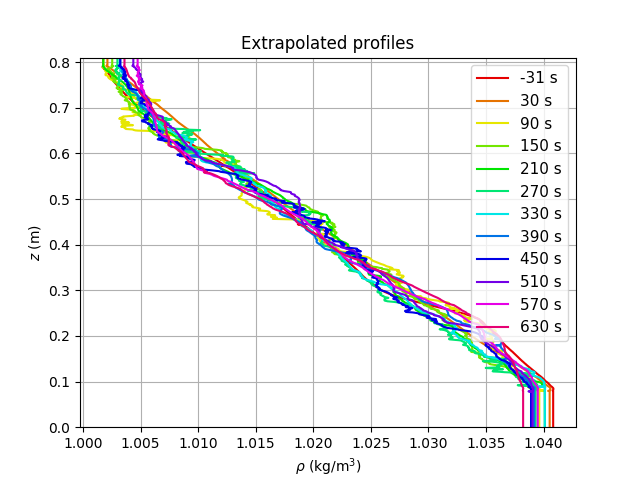

In [13]:
ap.plot_profiles()